In a 699 cell samples, a number of cell characteristics have been measured. The target is a categorical variables with two possible outcomes:
• Class 2: corresponding to a benign cell
• Class 4: corresponding to a malignant cell

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cell_samples.csv')
df.shape

(699, 11)

In [3]:
df.sample(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
595,1320141,5,1,1,1,2,1,2,1,1,2
48,1106095,4,1,1,3,2,1,3,1,1,2
107,1170420,1,6,8,10,8,10,5,7,1,4
357,859350,8,10,10,7,10,10,7,3,8,4
50,1108370,9,5,8,1,2,3,2,1,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.drop(columns=['BareNuc'], inplace=True)

In [6]:
df['Class'] = df.Class.apply(lambda x: -1 if x == 4 else 1)

In [7]:
df.sample(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
497,1182404,4,2,1,1,2,1,1,1,1
192,1212232,5,1,1,1,2,2,1,1,1
253,1100524,6,10,10,2,8,7,3,3,-1
25,1065726,5,2,3,4,2,3,6,1,-1
164,1197510,5,1,1,1,2,3,1,1,1


In [8]:
# Finding the size of each class
print('The number of benign samples =', len(df[df['Class']==1]), '\n')
print('The number of malignant samples =', len(df[df['Class']==-1]))

The number of benign samples = 458 

The number of malignant samples = 241


much closer to a balanced case than unbalanced one.

In [9]:
X = df[df.columns[1:-1]].values
y = df['Class'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=5)

In [10]:
from sklearn import svm

# Instantiating the SVM classifier with linear kernel
# We have allocated a small budget for (C=0.01) for margin violations

linearSVC = svm.SVC(kernel='linear', gamma='auto', C=0.01)

linearSVC.fit(X_train,y_train)

SVC(C=0.01, gamma='auto', kernel='linear')

In [11]:
y_pred = linearSVC.predict(X_test)

In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

score = metrics.accuracy_score(y_test,y_pred)

print('Test accuracy score of the model is ', round(score, 5))

Test accuracy score of the model is  0.94857


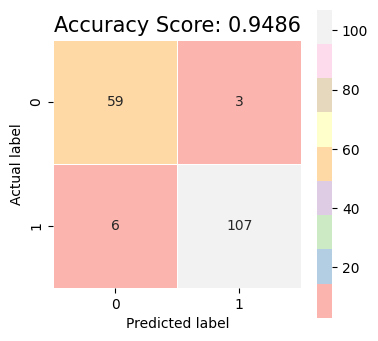

In [13]:
svc_c_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(svc_c_mat,annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(score, 4)) 
plt.title(all_sample_title, size = 15)
plt.show()

In [14]:
print('Test Classification Report: \n\n', classification_report(y_test, y_pred))

Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.91      0.95      0.93        62
           1       0.97      0.95      0.96       113

    accuracy                           0.95       175
   macro avg       0.94      0.95      0.94       175
weighted avg       0.95      0.95      0.95       175



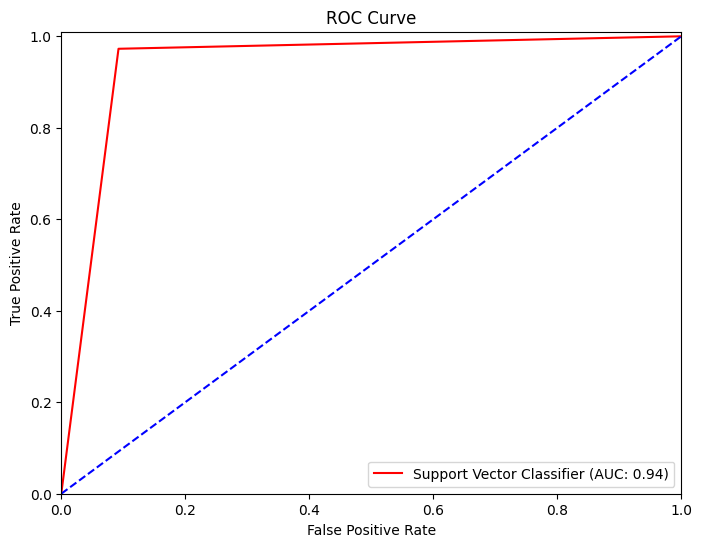

In [15]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds = roc_curve(y_pred,y_test)
auc(fpr,tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='Support Vector Classifier (AUC: %.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [16]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
def svm_clf(X_tr, X_ts, y_tr, y_ts, ker, C, gamma='auto', r=0, deg=1):
    clf = svm.SVC(kernel=ker, gamma=gamma, C=C, coef0=r, degree=deg)
    clf.fit(X_tr, y_tr)
    y_tr_pred = clf.predict(X_tr)
    y_ts_pred = clf.predict(X_ts)
    tr_score = metrics.accuracy_score(y_tr, y_tr_pred) # Compute train accuracy 
    ts_score = metrics.accuracy_score(y_ts, y_ts_pred) # Compute test accuracy 
    tr_report = classification_report(y_tr, y_tr_pred) # Generate classification report for train data
    ts_report = classification_report(y_ts, y_ts_pred) # Generate classification report for test data
    print('Train Classification Report: \n\n', tr_report,'\n\n') 
    print('Test Classification Report: \n\n', ts_report)
    return

In [17]:
svm_clf(X_train, X_test, y_train, y_test, ker='linear', C=0.01)

Train Classification Report: 

               precision    recall  f1-score   support

          -1       0.95      0.96      0.95       179
           1       0.98      0.97      0.98       345

    accuracy                           0.97       524
   macro avg       0.96      0.96      0.96       524
weighted avg       0.97      0.97      0.97       524
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.91      0.95      0.93        62
           1       0.97      0.95      0.96       113

    accuracy                           0.95       175
   macro avg       0.94      0.95      0.94       175
weighted avg       0.95      0.95      0.95       175



In [18]:
# Apply radial SVM with a relatively high budget for margin violation
svm_clf(X_train, X_test, y_train, y_test, ker='rbf', C=10)

Train Classification Report: 

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       179
           1       1.00      1.00      1.00       345

    accuracy                           1.00       524
   macro avg       1.00      1.00      1.00       524
weighted avg       1.00      1.00      1.00       524
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.88      0.94      0.91        62
           1       0.96      0.93      0.95       113

    accuracy                           0.93       175
   macro avg       0.92      0.93      0.93       175
weighted avg       0.93      0.93      0.93       175



In [19]:
# Apply polynomial SVM (with degree 3 and r=1) with very low budget for margin␣ ,→violation
svm_clf(X_train, X_test, y_train, y_test, ker='poly', C=0.001, r=1, deg=3)

Train Classification Report: 

               precision    recall  f1-score   support

          -1       0.96      0.97      0.96       179
           1       0.98      0.98      0.98       345

    accuracy                           0.98       524
   macro avg       0.97      0.97      0.97       524
weighted avg       0.98      0.98      0.98       524
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.92      0.92      0.92        62
           1       0.96      0.96      0.96       113

    accuracy                           0.94       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.94      0.94      0.94       175



In [20]:
# Apply sigmoid SVM (with r=2) with a relatively high budget for margin violation
svm_clf(X_train, X_test, y_train, y_test, ker='sigmoid', C=10, r=2)

Train Classification Report: 

               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       179
           1       0.60      0.79      0.69       345

    accuracy                           0.52       524
   macro avg       0.30      0.40      0.34       524
weighted avg       0.40      0.52      0.45       524
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        62
           1       0.60      0.81      0.69       113

    accuracy                           0.53       175
   macro avg       0.30      0.41      0.34       175
weighted avg       0.39      0.53      0.44       175

